In [117]:
import pandas as pd
import numpy as np

In [118]:
dataset = pd.read_csv ('ramen-ratings.csv', encoding ="utf8")
dataset = dataset.sample(frac=1, random_state=10)

In [119]:
dataset.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2530,50,Indomie,Mi Goreng,Pack,Indonesia,5.00,NaN
920,1660,Sau Tao,Ho Fan Wonton Soup Flavored,Pack,Hong Kong,3.00,NaN
2035,545,Golden Wheat,South Korean Style Spicy Beef,Pack,China,3.50,NaN
1797,783,Nissin,Cup Noodles Salsa Picante Chicken,Cup,USA,3.00,NaN
930,1650,Ottogi,Sesame Flavor Ramen Korean Style Instant Noodle,Pack,South Korea,4.25,NaN


In [120]:
dataset.Stars.unique()

array([5.   , 3.   , 3.5  , 4.25 , 4.   , 2.25 , 4.5  , 3.25 , 0.   ,
       1.75 , 3.75 , 4.3  , 2.75 , 4.75 , 1.5  , 0.25 , 0.5  , 1.   ,
       4.125, 2.   , 2.5  , 3.2  , 0.1  , 0.9  , 2.9  , 2.125, 3.3  ,
       3.7  , 3.125, 1.1  , 0.75 , 3.6  , 1.8  , 2.1  , 1.25 , 2.85 ,
       2.8  , 2.3  , 3.1  , 3.8  , 3.65 , 3.4  ])

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 2530 to 1289
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2580 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 161.2+ KB


In [122]:
# Remove any 'neutral' ratings equal to 3
dataset = dataset[dataset['Stars'] != 3.000]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
dataset['Positively Rated'] = np.where(dataset['Stars'] > 3.000, 1, 0)

In [123]:
dataset['Positively Rated'].unique()

array([1, 0])

In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2404 entries, 2530 to 1289
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Review #          2404 non-null   int64  
 1   Brand             2404 non-null   object 
 2   Variety           2404 non-null   object 
 3   Style             2403 non-null   object 
 4   Country           2404 non-null   object 
 5   Stars             2404 non-null   float64
 6   Top Ten           41 non-null     object 
 7   Positively Rated  2404 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 169.0+ KB


In [125]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(dataset['Variety'], 
                                                    dataset['Positively Rated'], 
                                                    random_state=0)

In [126]:
X_train.shape

(1803,)

In [127]:
X_test.shape

(601,)

# Model Selection in scikit-learn

In [128]:
from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(dataset['Variety'], 
                                                    dataset['Positively Rated'], 
                                                    random_state=0)

In [129]:
print( X_train.iloc[10])  

Super Bowl Artificial Stewed Pork Chop


In [130]:
X_train.shape

(1803,)

In [131]:
X_test.shape

(601,)

# BOW

In [132]:
from sklearn.feature_extraction.text import CountVectorizer #

In [133]:
from sklearn.feature_extraction.text import CountVectorizer #

docs = np.array([
    'The ramen is delicious',
    'The ramen is sweet',
    'The ramen is spicy and the taste is good'])

# Fit the CountVectorizer to the training data 
vect1=CountVectorizer().fit(docs)

# transform the documents in the training data to a document-term matrix. #matrix format = numbers
bag = vect1.transform(docs) 

In [134]:
vect1.vocabulary_

{'the': 8,
 'ramen': 4,
 'is': 3,
 'delicious': 1,
 'sweet': 6,
 'spicy': 5,
 'and': 0,
 'taste': 7,
 'good': 2}

In [135]:
vect1.get_feature_names_out() #get featuer etc will give you keyword

array(['and', 'delicious', 'good', 'is', 'ramen', 'spicy', 'sweet',
       'taste', 'the'], dtype=object)

In [154]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized1, y_train)

#x_train
#vectors (unique tokens)

ValueError: Found input variables with inconsistent numbers of samples: [30, 1803]

In [155]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(review1.transform(X_test))
y_proba = model.predict_proba(review1.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1]))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# TFidf

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer #we need this vectoriser

docs = np.array([
    'The ramen is delicious',
    'The ramen is sweet',
    'The ramen is spicy and the taste is good'])

vect2 = TfidfVectorizer().fit(docs)
bag2 = vect2.transform(docs)

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data 
review2 = TfidfVectorizer(min_df=5).fit(X_train) #raw unique tokens # the min_dif is 

In [138]:
len(review2.get_feature_names_out())

245

In [139]:
X_train_vectorized2 = review2.transform(X_train) #unique tokens in vector format

model = LogisticRegression()
model.fit(X_train_vectorized2, y_train)

predictions = model.predict(review2.transform(X_test))
y_proba = model.predict_proba(review2.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1])) 

AUC:  0.6465571021951885


# n grams

In [140]:
# Try 2-gram representation

docs = np.array([
    'The ramen is delicious',
    'The ramen is sweet',
    'The ramen is spicy and the taste is good'])

vect3=CountVectorizer(ngram_range=(1,2)).fit(docs)
bag3=vect3.transform(docs)

In [141]:
vect3.vocabulary_

{'the': 16,
 'ramen': 9,
 'is': 4,
 'delicious': 2,
 'the ramen': 17,
 'ramen is': 10,
 'is delicious': 5,
 'sweet': 13,
 'is sweet': 8,
 'spicy': 11,
 'and': 0,
 'taste': 14,
 'good': 3,
 'is spicy': 7,
 'spicy and': 12,
 'and the': 1,
 'the taste': 18,
 'taste is': 15,
 'is good': 6}

In [142]:
review3 = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train) #raw unique tokens

X_train_vectorized3 = review3.transform(X_train) #vectorized unique tokens

In [143]:
len(review3.get_feature_names_out())

451

In [144]:
model = LogisticRegression()
model.fit(X_train_vectorized3, y_train)

predictions = model.predict(review3.transform(X_test))
y_proba = model.predict_proba(review3.transform(X_test))
                              
print('AUC: ', roc_auc_score(y_test, y_proba[:,1])) 

AUC:  0.6456408156899442


In [147]:
feature_names_out = np.array(review3.get_feature_names_out())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:' )
print(feature_names_out[sorted_coef_index[:10]])
      
print('\n Largest Coefs:')      
print(feature_names_out[sorted_coef_index[:-11:-1]])

Smallest Coefs:
['noodles in' 'mushroom' 'desse' 'vegan' 'teriyaki' 'sweet' 'soup chicken'
 'thread' 'satay' 'seaweed']

 Largest Coefs:
['tonkotsu' 'goreng' 'flavor ramen' 'good' 'soup flavored' 'style instant'
 'udon' 'men' 'chicken soup' 'garlic']


In [148]:
print(model.predict(review3.transform(['okay, noodles is nice',
                                    'quick, good service'])))

[1 1]


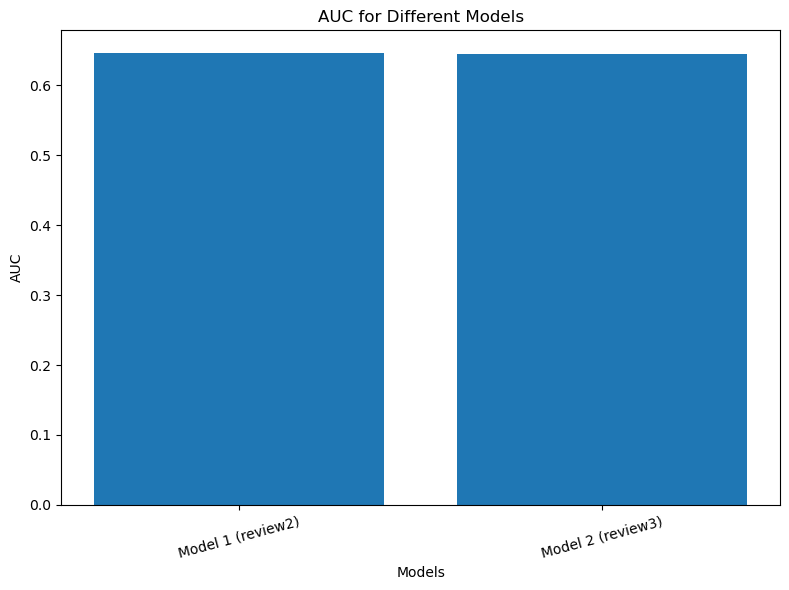

In [149]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Initialize lists to store AUC values and model names
auc_values = []
model_names = []

# Model 1 (review2)
X_train_vectorized2 = review2.transform(X_train)
model1 = LogisticRegression()
model1.fit(X_train_vectorized2, y_train)
y_proba1 = model1.predict_proba(review2.transform(X_test))
auc1 = roc_auc_score(y_test, y_proba1[:, 1])
auc_values.append(auc1)
model_names.append("Model 1 (review2)")

# Model 2 (review3)
X_train_vectorized3 = review3.transform(X_train)
model2 = LogisticRegression()
model2.fit(X_train_vectorized3, y_train)
y_proba2 = model2.predict_proba(review3.transform(X_test))
auc2 = roc_auc_score(y_test, y_proba2[:, 1])
auc_values.append(auc2)
model_names.append("Model 2 (review3)")

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, auc_values)
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("AUC for Different Models")
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar plot
plt.show()


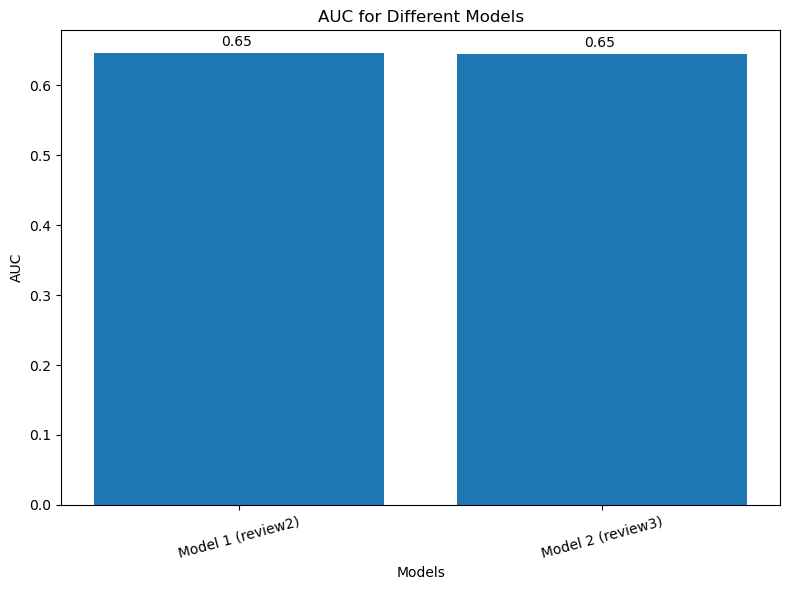

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Initialize lists to store AUC values and model names
auc_values = []
model_names = []

# Model 1 (review2)
X_train_vectorized2 = review2.transform(X_train)
model1 = LogisticRegression()
model1.fit(X_train_vectorized2, y_train)
y_proba1 = model1.predict_proba(review2.transform(X_test))
auc1 = roc_auc_score(y_test, y_proba1[:, 1])
auc_values.append(auc1)
model_names.append("Model 1 (review2)")

# Model 2 (review3)
X_train_vectorized3 = review3.transform(X_train)
model2 = LogisticRegression()
model2.fit(X_train_vectorized3, y_train)
y_proba2 = model2.predict_proba(review3.transform(X_test))
auc2 = roc_auc_score(y_test, y_proba2[:, 1])
auc_values.append(auc2)
model_names.append("Model 2 (review3)")

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, auc_values)
plt.xlabel("Models")
plt.ylabel("AUC")
plt.title("AUC for Different Models")
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability

# Display data figures on top of the bars
for bar, auc in zip(bars, auc_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, auc + 0.01, f"{auc:.2f}", fontsize=10)

plt.tight_layout()

# Show the bar plot
plt.show()

